## Explore NASA Exoplanet Data 

> J. Colliander  
> 2022-06-08 (at [3rd Jack Eddy Symposium](https://cpaess.ucar.edu/meetings/eddy-symposium-2022)); further exploration at Baker 2022-06-17

The NASA Exoplanet Institute at Caltech hosts the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/). This resource provides the data on known exoplanets and mobilizes this data with an [applied programming interface (API)](https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html). The [API Queries](https://exoplanetarchive.ipac.caltech.edu/docs/API_queries.html) page provides example calls. The 353 columns in the PS data set are catalogued: https://exoplanetarchive.ipac.caltech.edu/docs/Exoplanet_Archive_Column_Mapping.pdf

The goals for this short notebook: 

- [x] ingest NASA Exoplanet data via API
- [x] transform data into Pandas Dataframe
- [x] start exploration of data

Exoplanets and Kepler's Laws Lesson: https://kcts9.pbslearningmedia.org/resource/buac18-912-sci-ess-exokeplerslaws-lp/exoplanets-through-keplers-laws-lesson-plan/

Eyes on Exoplanets is awesome: https://exoplanets.nasa.gov/eyes-on-exoplanets/#/system/TRAPPIST-1/

## Kepler's Third Law

$$
T^2 \thicksim \frac{4 \pi^2}{G M} a^3
$$

In [1]:
# gather some tools
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
# set default figure size
plt.rcParams["figure.figsize"] = (20, 10)

In [59]:
# This line reads in the data (as rendered in CSV format) from the Archive's API into a Pandas dataframe.
# First version of this call generates an error message that led me to add the low_memory flag.
df = pd.read_csv('https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+ps&format=csv', low_memory=False)
## "All planetary solutions for confirmed planets with all columns from the Planetary Systems Table. 
## Output is in comma separated (csv) format.

The structure of the Planetary Systems Table is described here: [https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html](https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html)

Features of the PS table:

+ one row per planet
+ why are there 32,552 rows when there are ~5K exoplanets known in June 2022?
+ 353 columns

## Exploring the data

In [60]:
# max number of stars
df['sy_snum'].max()

4

In [61]:
# max number of planets
df['sy_pnum'].max()

8

In [62]:
df['pl_dens'].max()

77.7

This seems outlandish. Is there really a planet with density 77.7?

In [63]:
len(df)

32552

In [64]:
len(df.columns)

353

In [65]:
# Host stars
len(df['hostname'].unique())

3781

In [119]:
# Last update to the data set
df['releasedate'].max()

'2022-06-09'

<AxesSubplot:xlabel='pl_rade'>

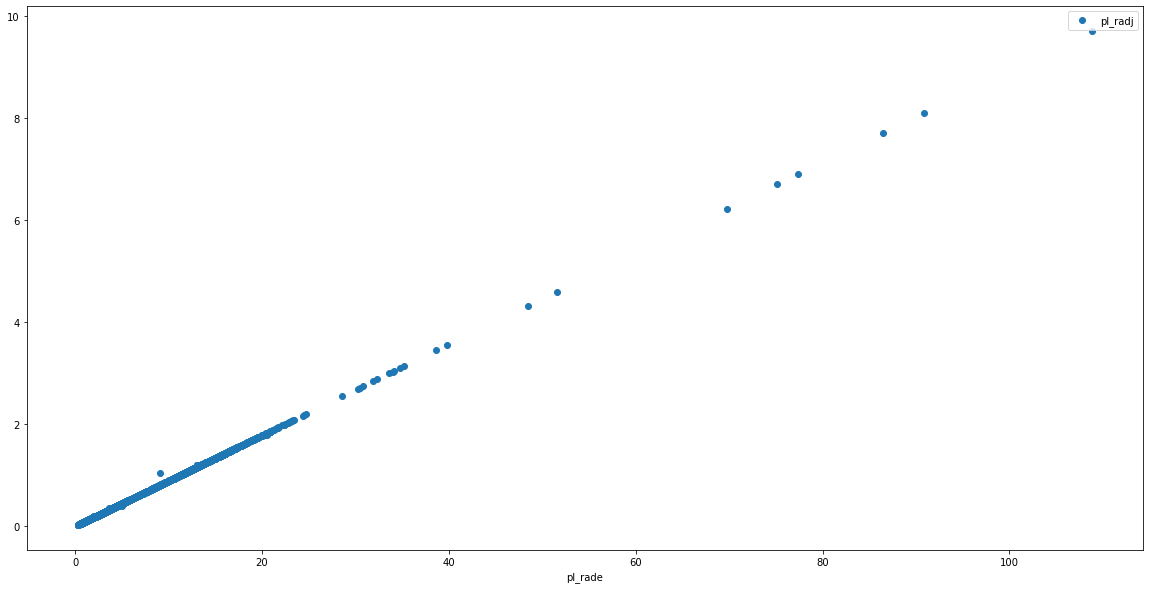

In [120]:
# Sanity check. Plot planetary radius in Earth radii vs. planetary radius in Jupyter radii.
# Hmm. Why is there a blip off the line near 8 pl_rade?
df.plot(x='pl_rade', y='pl_radj', style='o')

<AxesSubplot:xlabel='pl_massj'>

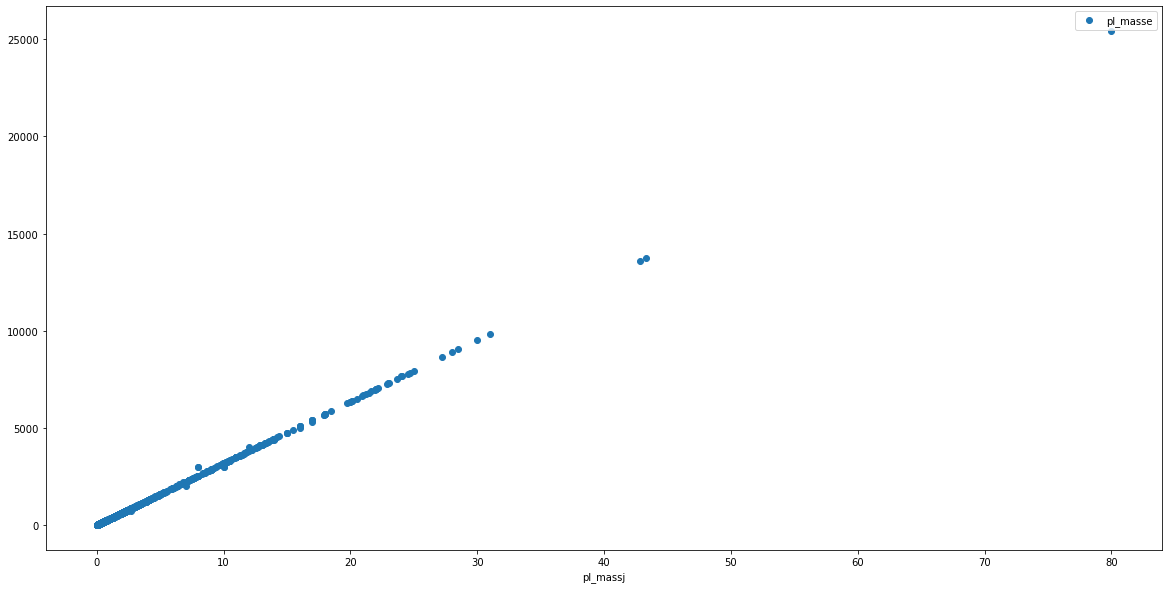

In [69]:
# mass in Earths vs. Jupyters
# same blip in data
df.plot(x='pl_massj', y='pl_masse', style='o')

<AxesSubplot:xlabel='pl_dens'>

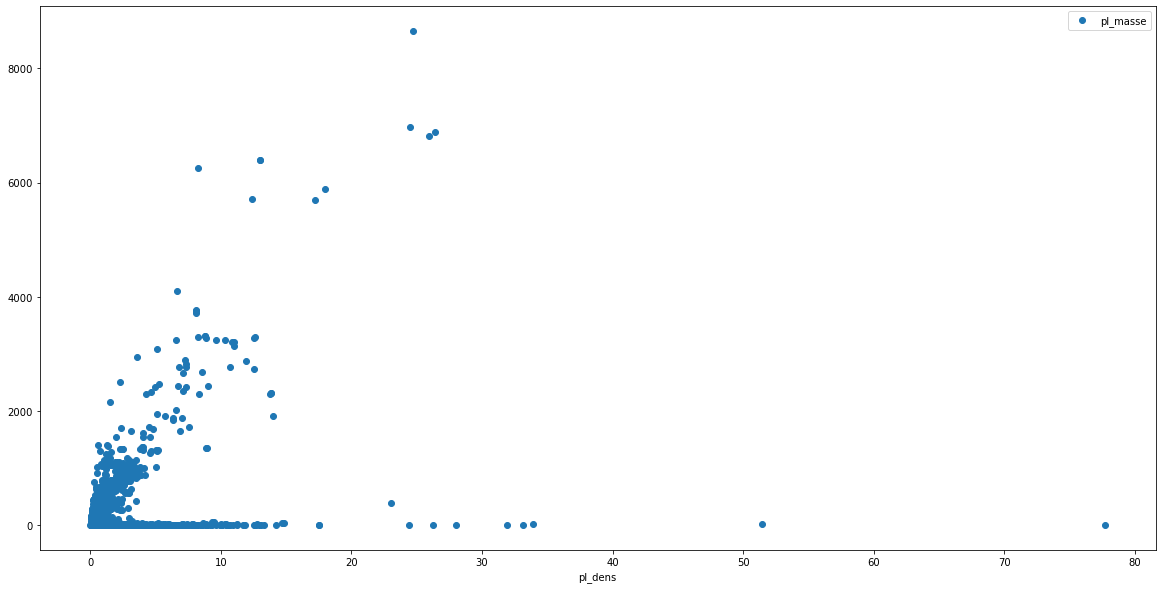

In [70]:
df.plot(x='pl_dens', y='pl_masse', style='o')

## Radius vs. Mass exoplanet distribution

<AxesSubplot:xlabel='pl_massj'>

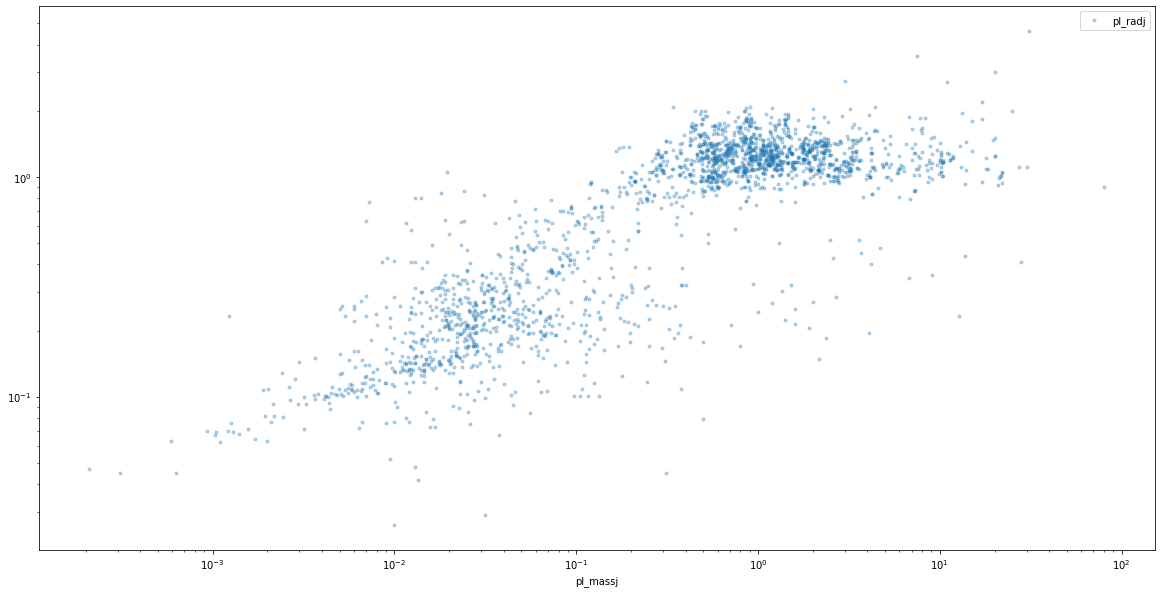

In [105]:
# radius vs. mass in Jupiter units on log-log plot
df.plot(y='pl_radj', x='pl_massj', style='.', alpha=0.3, logx=True, logy=True)

<AxesSubplot:xlabel='pl_orbsmax'>

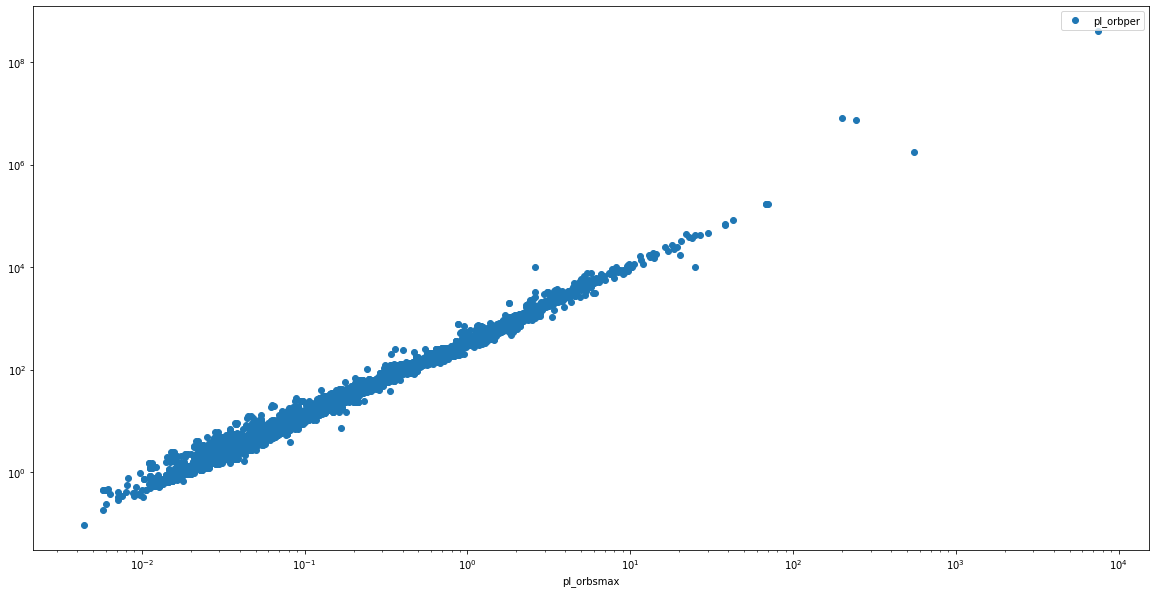

In [126]:
# semimajor axis vs. orbital period
# Is slope consistent with Kepler's Third Law?
df.plot(x='pl_orbsmax', y='pl_orbper', style='o', logx=True, logy=True)

In [75]:
kepler = [df['pl_orbper']**2/df['pl_orbsmax']**3]

In [78]:
kepler

[0        142442.373570
 1        139509.779862
 2        117655.493051
 3         72639.701447
 4        178571.428571
              ...      
 32547    111113.737964
 32548              NaN
 32549              NaN
 32550              NaN
 32551              NaN
 Length: 32552, dtype: float64]

## Radii exoplanet distribution

<AxesSubplot:ylabel='Frequency'>

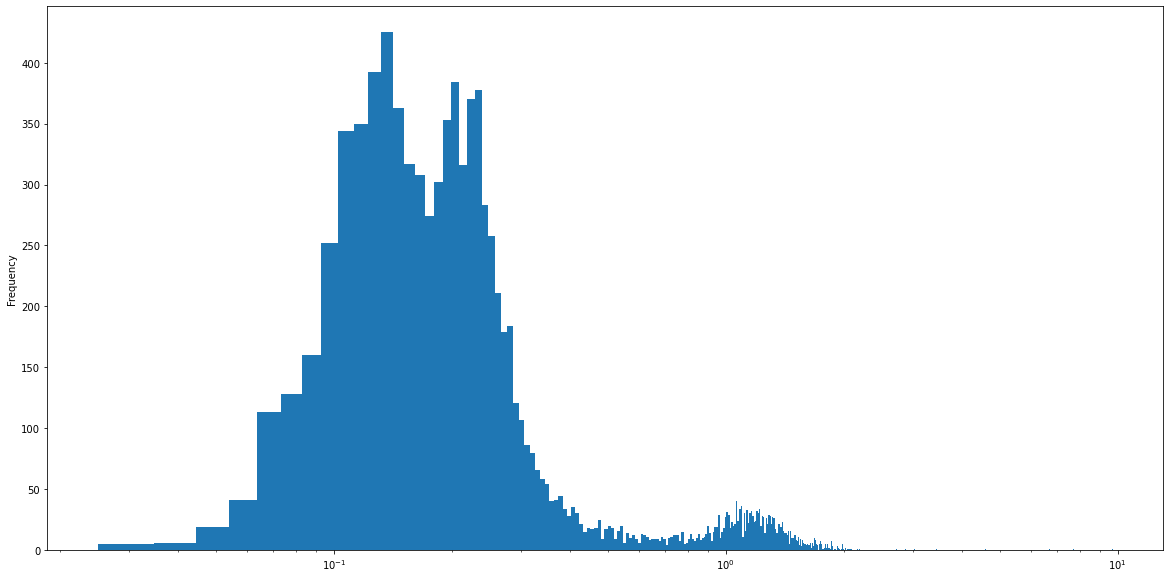

In [109]:
# distribution of planetary radii in Jupiter units on log plot
df['pl_radj'].plot(kind='hist', bins = 1000, logx=True)

<AxesSubplot:xlabel='pl_radj'>

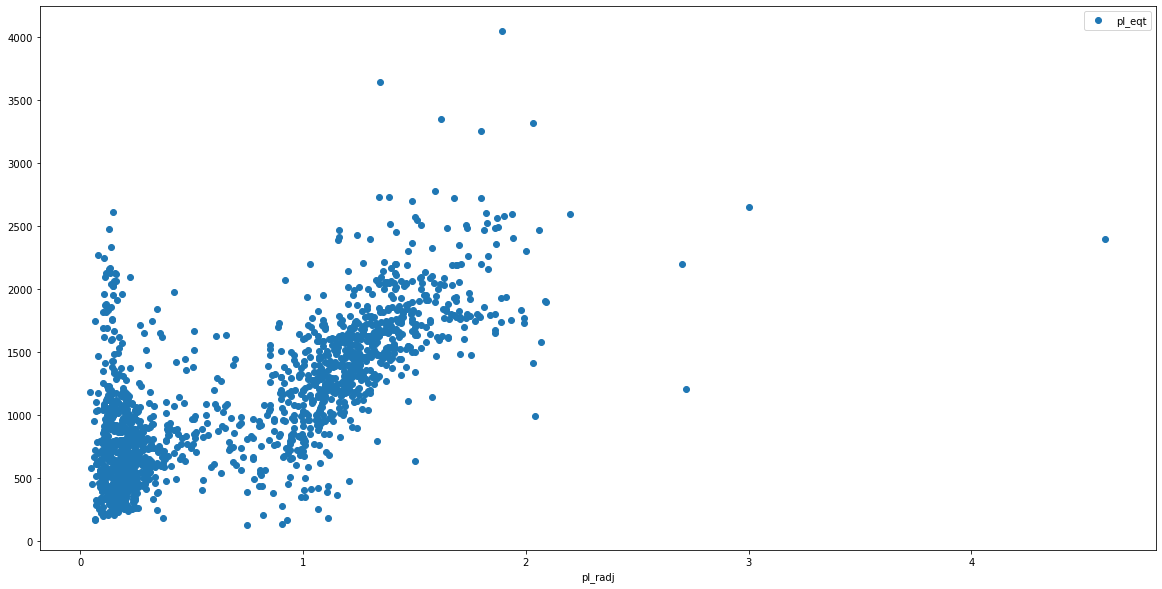

In [85]:
# Radius in Jupiters vs. equilibrium temperature
df.plot(x='pl_radj', y='pl_eqt', style='o')

## Explore host stars

In [87]:
df['hostname'].unique()

array(['Kepler-11', 'OGLE-TR-10', 'HD 210702', ..., 'KMT-2017-BLG-2509L',
       'OGLE-2017-BLG-1099L', 'OGLE-2019-BLG-0299L'], dtype=object)

### example system: Trappist-1

In [88]:
TRAPPIST1 = df.loc[df['hostname']=='TRAPPIST-1']

<AxesSubplot:xlabel='pl_orbper'>

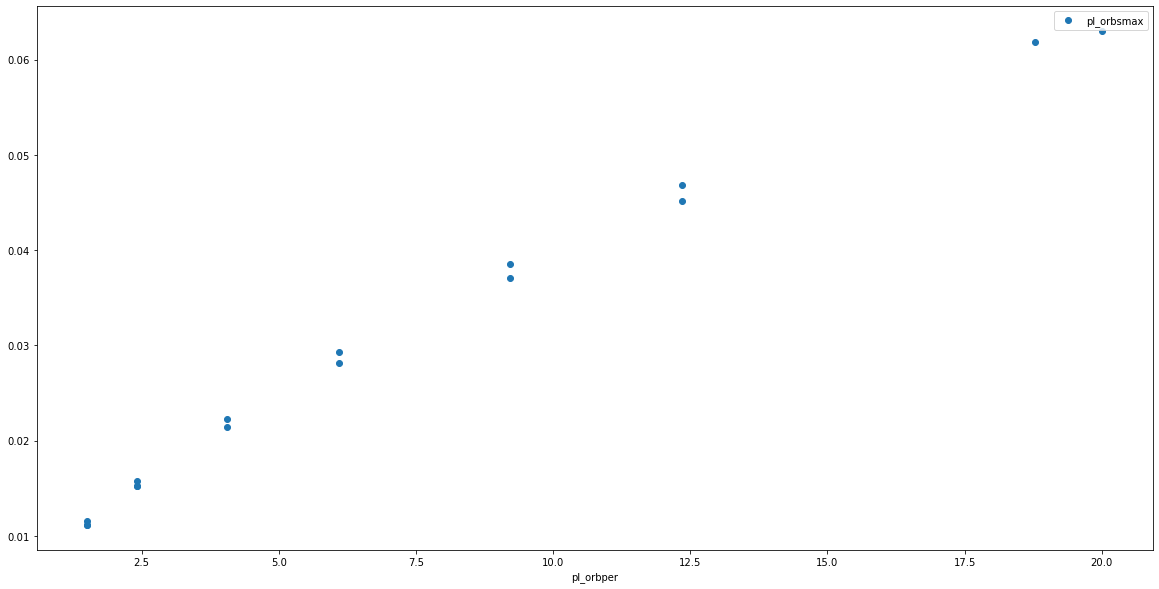

In [89]:
TRAPPIST1.plot(x='pl_orbper',y='pl_orbsmax', style = 'o')

In [91]:
TRAPPIST1

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,gaia_id,default_flag,pl_refname,sy_refname,...,sy_jmagerr1,sy_jmagerr2,sy_jmagstr,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_hmagstr,sy_kmag,sy_kmagerr1,sy_kmagerr2
1860,TRAPPIST-1 b,b,TRAPPIST-1,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,0,<a refstr=GILLON_ET_AL__2016 href=https://ui.a...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.022,-0.022,11.354&plusmn;0.022,10.718,0.021,-0.021,10.718&plusmn;0.021,10.296,0.023,-0.023
1861,TRAPPIST-1 b,b,TRAPPIST-1,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,0,<a refstr=GILLON_ET_AL__2017 href=https://ui.a...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.022,-0.022,11.354&plusmn;0.022,10.718,0.021,-0.021,10.718&plusmn;0.021,10.296,0.023,-0.023
1862,TRAPPIST-1 c,c,TRAPPIST-1,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,0,<a refstr=GILLON_ET_AL__2017 href=https://ui.a...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.022,-0.022,11.354&plusmn;0.022,10.718,0.021,-0.021,10.718&plusmn;0.021,10.296,0.023,-0.023
1863,TRAPPIST-1 g,g,TRAPPIST-1,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,1,<a refstr=AGOL_ET_AL__2021 href=https://ui.ads...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.022,-0.022,11.354&plusmn;0.022,10.718,0.021,-0.021,10.718&plusmn;0.021,10.296,0.023,-0.023
1864,TRAPPIST-1 h,h,TRAPPIST-1,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,1,<a refstr=AGOL_ET_AL__2021 href=https://ui.ads...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.022,-0.022,11.354&plusmn;0.022,10.718,0.021,-0.021,10.718&plusmn;0.021,10.296,0.023,-0.023
9345,TRAPPIST-1 d,d,TRAPPIST-1,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,1,<a refstr=AGOL_ET_AL__2021 href=https://ui.ads...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.022,-0.022,11.354&plusmn;0.022,10.718,0.021,-0.021,10.718&plusmn;0.021,10.296,0.023,-0.023
9348,TRAPPIST-1 c,c,TRAPPIST-1,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,0,<a refstr=GILLON_ET_AL__2016 href=https://ui.a...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.022,-0.022,11.354&plusmn;0.022,10.718,0.021,-0.021,10.718&plusmn;0.021,10.296,0.023,-0.023
11043,TRAPPIST-1 e,e,TRAPPIST-1,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,1,<a refstr=AGOL_ET_AL__2021 href=https://ui.ads...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.022,-0.022,11.354&plusmn;0.022,10.718,0.021,-0.021,10.718&plusmn;0.021,10.296,0.023,-0.023
12378,TRAPPIST-1 b,b,TRAPPIST-1,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,0,<a refstr=GRIMM_ET_AL__2018 href=https://ui.ad...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.022,-0.022,11.354&plusmn;0.022,10.718,0.021,-0.021,10.718&plusmn;0.021,10.296,0.023,-0.023
12644,TRAPPIST-1 f,f,TRAPPIST-1,NaN,NaN,TIC 278892590,Gaia DR2 2635476908753563008,0,<a refstr=GRIMM_ET_AL__2018 href=https://ui.ad...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.022,-0.022,11.354&plusmn;0.022,10.718,0.021,-0.021,10.718&plusmn;0.021,10.296,0.023,-0.023


In [28]:
TRAPPIST1['pl_name'].unique()

array(['TRAPPIST-1 b', 'TRAPPIST-1 c', 'TRAPPIST-1 g', 'TRAPPIST-1 h',
       'TRAPPIST-1 d', 'TRAPPIST-1 e', 'TRAPPIST-1 f'], dtype=object)